# IO Saving and Loading Solution Data

In [1]:
using DifferentialEquations

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [2]:
f_2dlinear = (du,u,p,t) -> du.=1.01u
prob = ODEProblem(f_2dlinear,rand(2,2),(0.0,1.0))
sol1 =solve(prob,Euler();dt=1//2^(4))

retcode: Success
Interpolation: 3rd order Hermite
t: 17-element Array{Float64,1}:
 0.0   
 0.0625
 0.125 
 0.1875
 0.25  
 0.3125
 0.375 
 0.4375
 0.5   
 0.5625
 0.625 
 0.6875
 0.75  
 0.8125
 0.875 
 0.9375
 1.0   
u: 17-element Array{Array{Float64,2},1}:
 [0.06747070835068647 0.8405984881196724; 0.4919755179695293 0.28052101059942447]
 [0.07172979681532356 0.8936612676822268; 0.5230314725413558 0.29822889939351316]
 [0.07625774023929086 0.9500736352046674; 0.556047834245529 0.31705459866772867] 
 [0.08107151009189609 1.010047033426962; 0.5911483537822779 0.337068670208629]   
 [0.08618914916644703 1.073806252412039; 0.6284645936147842 0.3583461300155487]  
 [0.091629839207579 1.141590272095549; 0.6681364210867174 0.3809667294727802]    
 [0.09741397280755743 1.2136531580215806; 0.7103125326678165 0.40501525427074947]
 [0.10356322984103448 1.2902650136216929; 0.7551510112924724 0.4305818421965905] 
 [0.11010065872474979 1.3717129926065623; 0.8028199188803098 0.45776232098525027]
 [0

In [3]:
using IterableTables, DataFrames
df = DataFrame(sol1)

,timestamp,value1,value2,value3,value4
,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0674707,0.491976,0.840598,0.280521
2,0.0625,0.0717298,0.523031,0.893661,0.298229
3,0.125,0.0762577,0.556048,0.950074,0.317055
4,0.1875,0.0810715,0.591148,1.01005,0.337069
5,0.25,0.0861891,0.628465,1.07381,0.358346
6,0.3125,0.0916298,0.668136,1.14159,0.380967
7,0.375,0.097414,0.710313,1.21365,0.405015
8,0.4375,0.103563,0.755151,1.29027,0.430582
9,0.5,0.110101,0.80282,1.37171,0.457762


In [4]:
using ParameterizedFunctions

f = @ode_def LotkaVolterra begin
  dx = a*x - b*x*y
  dy = -3y + x*y
end a b

prob = ODEProblem(f,[1.0,1.0],(0.0,1.0),[1.5,1.0])
sol2 =solve(prob,Tsit5(),alg_hints=:auto, dt=0.01,
            maxiters=1000, progress=true)

┌ Info: Precompiling ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
└ @ Base loading.jl:1273


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 8-element Array{Float64,1}:
 0.0                
 0.01               
 0.09330906061888843
 0.2520415242259572 
 0.4512032849587153 
 0.7028732693691873 
 0.9696506451204818 
 1.0                
u: 8-element Array{Array{Float64,1},1}:
 [1.0, 1.0]                               
 [1.0051122769587826, 0.9802235456140976] 
 [1.0563069927881426, 0.8318190527631448] 
 [1.1959216073367243, 0.6173492690145177] 
 [1.4530132889157068, 0.44148317441456203]
 [1.9301288382659876, 0.31636999828654094]
 [2.6704161241475584, 0.2609080772987886] 
 [2.7728492160727733, 0.25871049897303866]

In [5]:
df = DataFrame(sol2)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,1.00511,1.05631,1.19592,1.45301,1.93013,2.67042,2.77285
2,1.0,0.980224,0.831819,0.617349,0.441483,0.31637,0.260908,0.25871


In [6]:
using CSV
CSV.write("io_save_load_out.csv",df)

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


"io_save_load_out.csv"

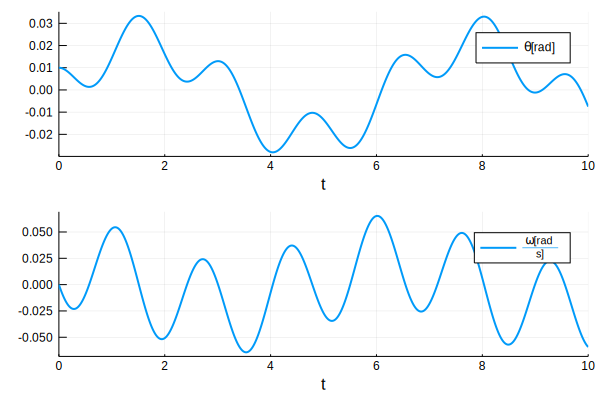

In [8]:
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass[m]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["\\theta [rad]" "\\omega [rad/s]"],layout=(2,1))